In [1]:
# 导入数据
import h5py

In [2]:
# 训练原始数据
train_data = h5py.File('/Users/jiangyu\\Desktop/Works/datasets/train_catvnoncat.h5','r')
test_data = h5py.File('/Users/jiangyu\\Desktop/Works/datasets/test_catvnoncat.h5','r')

In [3]:
for key in train_data.keys():
    print(key)
# x 是输入特征
# y 是标签

list_classes
train_set_x
train_set_y


In [4]:
train_data['train_set_x'].shape   # 训练特征的维度（特征）

(209, 64, 64, 3)

In [5]:
train_data['train_set_y'].shape  # 训练标签的维度

(209,)

In [6]:
for key in test_data.keys():  # 遍历测试数据的关键字
    print(key)

list_classes
test_set_x
test_set_y


In [7]:
test_data['test_set_x'].shape  # 测试特征的维度

(50, 64, 64, 3)

In [8]:
test_data['test_set_y'].shape  # 测试标签的维度

(50,)

In [9]:
# 取出训练集，测试集  [:]表示取出所有
train_data_org = train_data['train_set_x'][:]   # 取出训练集维度
train_labels_org = train_data['train_set_y'][:] # 取出训练集中所有标签
test_data_org = test_data['test_set_x'][:]      # 取出测试集中维度
test_labels_org = test_data['test_set_y'][:]    # 取出测试集中所有标签

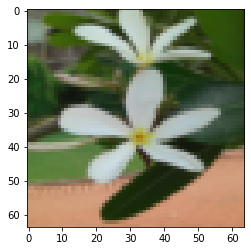

In [20]:
# 查看图片
import matplotlib.pyplot as plt  # 导入模块
%matplotlib inline  # 在线显示
plt.imshow(train_data_org[176])  # 显示训练集中的第176张照片

In [21]:
# 数据维度的处理
m_train = train_data_org.shape[0]  #  [0] 表示取维度里面的第一个 209
m_test = test_data_org.shape[0]    #  [0] 表示取维度里面的第一个 50
train_data_tran = train_data_org.reshape(m_train, -1).T  #  （ m_train，-1） -1表示后面的三个样本变成一列  -- （.T : 表示转置）
test_data_tran = test_data_org.reshape(m_test, -1).T

In [22]:
print(m_train, m_test)  #  打印训练集和测试集的样本数

209 50


In [23]:
print(train_data_tran.shape, test_data_tran.shape)   # 打印训练集和测试集的维度

(12288, 209) (12288, 50)


In [24]:
# 标签的处理
import numpy as np    # 导入 numpy 模块
train_labels_tran = train_labels_org[np.newaxis,:]  # 表示对（209，） 进行转置操作
test_labels_tran = test_labels_org[np.newaxis,:]  # 表示对（50，） 进行转置操作
print(train_labels_tran.shape,test_labels_tran.shape)  # 打印标签转置后的维度

(1, 209) (1, 50)


In [25]:
print(test_data_tran, train_data_tran)  

[[158 115 255 ...  41  18 133]
 [104 110 253 ...  47  18 163]
 [ 83 111 254 ...  84  16  75]
 ...
 [173 171 133 ... 183 144   5]
 [128 176 101 ... 141 137  22]
 [110 186 121 ... 116 108   5]] [[ 17 196  82 ... 143  22   8]
 [ 31 192  71 ... 155  24  28]
 [ 56 190  68 ... 165  23  53]
 ...
 [  0  82 138 ...  85   4   0]
 [  0  80 141 ... 107   5   0]
 [  0  81 142 ... 149   0   0]]


In [26]:
# 标准化数据,为了方便计算  (归一化)
train_data_sta = train_data_tran / 255
test_data_sta = test_data_tran / 255
print(train_data_sta[:9,:9], test_data_sta[:9,:9])

[[0.06666667 0.76862745 0.32156863 0.00392157 0.03529412 0.32941176
  0.21960784 0.0745098  0.24705882]
 [0.12156863 0.75294118 0.27843137 0.08627451 0.03529412 0.30980392
  0.22352941 0.08627451 0.26666667]
 [0.21960784 0.74509804 0.26666667 0.00784314 0.01960784 0.19607843
  0.09019608 0.00784314 0.23921569]
 [0.08627451 0.75686275 0.34901961 0.00392157 0.03921569 0.32941176
  0.20392157 0.09019608 0.25098039]
 [0.12941176 0.72941176 0.3254902  0.05490196 0.03529412 0.30980392
  0.21568627 0.10196078 0.26666667]
 [0.23137255 0.71372549 0.3254902  0.00784314 0.02352941 0.2
  0.0745098  0.00784314 0.23529412]
 [0.09803922 0.7372549  0.39215686 0.00392157 0.03529412 0.30196078
  0.16862745 0.10588235 0.26666667]
 [0.1372549  0.70196078 0.38431373 0.05098039 0.03529412 0.28235294
  0.20784314 0.11372549 0.27843137]
 [0.24313725 0.68235294 0.40784314 0.00392157 0.02352941 0.17254902
  0.06666667 0.00784314 0.22745098]] [[0.61960784 0.45098039 1.         0.99607843 0.37647059 0.10196078
  

In [27]:
# 先定义Sigmoid函数
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

In [28]:
# 初始化参数
n_dim = train_data_tran.shape[0]
print(n_dim)

12288


In [29]:
w = np.zeros((n_dim, 1))
b = 0
print(w)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


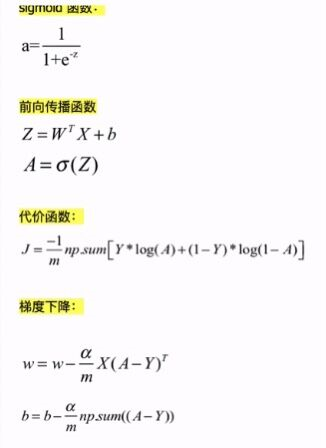

In [30]:
# 前向传播函数, 代价函数以及梯度下降
def propagate(w, b, X, y):
    
    # 1、前行传播函数
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    
    # 2、代价函数   cost function
    m = X.shape[1]
    J = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    
    # 3、梯度下降
    dw = 1/m * np.dot(X, (A - y).T)
    db = 1/m * np.sum(A - y)
    grands = {"dw": dw, "db": db}
    return grands, J

In [31]:
# 优化部分
def optimize(w, b, X, y, alpha, n_iters, print_cost):
    costs = []
    for i in range(n_iters):
        grands, J = propagate(w, b, X, y)
        dw = grands["dw"]
        db = grands["db"]
        
        w = w - alpha * dw
        b = b - alpha * db
        
        if i % 100 == 0:
            costs.append(J)
            if print_cost:
                print("n_iters is", i, "cost is", J)
        
    grands = {"dw": dw, "db": db}
    params = {"w": w, "b": b}
    
    return grands, params, costs

In [32]:
# 预测部分
def predict(w, b, X_test):
    
    Z = np.dot(w.T, X_test) + b
    A = sigmoid(Z)
    
    m = X_test.shape[1]
    y_pred = np.zeros((1, m))   # (1,m)表示 1行m列
    
    for i in range(m):
        if A[:,i] > 0.5:        # [:,i]表示所有行，某一列
            y_pred[:,i] = 1
        else:
            y_pred[:,i] = 0
    return y_pred

In [33]:
# 模型整合
def model(w, b, X_train, y_train, X_test, y_test, alpha, n_iters, print_cost):
    grands, params, costs = optimize(w, b, X_train, y_train, alpha, n_iters, print_cost)
    w = params["w"]
    b = params["b"]
    y_pred_train = predict(w, b, X_train)
    y_pred_test = predict(w, b, X_test)
    
    print("The train acc is", np.mean(y_pred_train == y_train) * 100, "%")  # 准确率是：
    print("The test acc is", np.mean(y_pred_test == y_test) * 100, "%")
    
    d = {"w": w, "b": b,"costs":costs ,"y_pred_train": y_pred_train, "y_pred_test": y_pred_test, "alpha": alpha}
    
    return d 

In [34]:
d = model(w, b, train_data_sta, train_labels_tran, test_data_sta, test_labels_tran, alpha = 0.005, n_iters = 2000, print_cost = True)

n_iters is 0 cost is 0.6931471805599453
n_iters is 100 cost is 0.5845083636993086
n_iters is 200 cost is 0.4669490409465546
n_iters is 300 cost is 0.37600686694802077
n_iters is 400 cost is 0.3314632893282512
n_iters is 500 cost is 0.3032730674743828
n_iters is 600 cost is 0.27987958658260487
n_iters is 700 cost is 0.26004213692587563
n_iters is 800 cost is 0.24294068467796615
n_iters is 900 cost is 0.22800422256726066
n_iters is 1000 cost is 0.21481951378449643
n_iters is 1100 cost is 0.2030781906064499
n_iters is 1200 cost is 0.19254427716706857
n_iters is 1300 cost is 0.1830333379688351
n_iters is 1400 cost is 0.1743985943844888
n_iters is 1500 cost is 0.16652139705400335
n_iters is 1600 cost is 0.15930451829756617
n_iters is 1700 cost is 0.15266732471296507
n_iters is 1800 cost is 0.14654223503982336
n_iters is 1900 cost is 0.14087207570310162
The train acc is 99.04306220095694 %
The test acc is 70.0 %


Text(0, 0.5, 'cost')

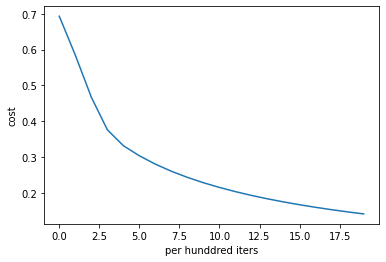

In [35]:
plt.plot(d["costs"])
plt.xlabel("per hunddred iters")
plt.ylabel("cost")

In [36]:
index = 20
print('y is',test_labels_tran[0, index])
print('y_prediction is',int(d['y_pred_test'][0, index]))

y is 1
y_prediction is 1


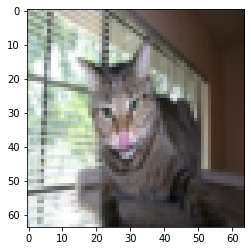

In [37]:
plt.imshow(test_data_org[index])

alpha =  0.01
The train acc is 99.52153110047847 %
The test acc is 70.0 %
alpha =  0.001
The train acc is 91.38755980861244 %
The test acc is 68.0 %
alpha =  0.0001
The train acc is 71.29186602870813 %
The test acc is 40.0 %


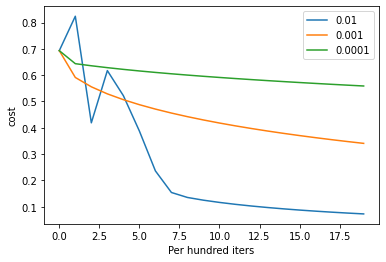

In [38]:
# 不同 alpha 值的比较
alphas = [0.01, 0.001, 0.0001]
for i in alphas:
    print('alpha = ',i)
    d = model(w, b, train_data_sta, train_labels_tran, test_data_sta, test_labels_tran, alpha = i, n_iters = 2000, print_cost = False)
    print('==========')
    plt.plot(d['costs'], label = str(i))
plt.xlabel('Per hundred iters')
plt.ylabel('cost')
plt.legend()

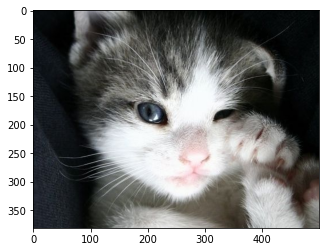

In [51]:
# 预测新图片
# 显示图像
import matplotlib.pyplot as plt
from matplotlib.image import imread
image = imread("C:\\Users\\jiangyu\\Desktop\\Pictures\\Cats\\cat3.jpg")
plt.imshow(image)
plt.show()

In [52]:
image.shape

(381, 500, 3)

In [53]:
from skimage import transform

In [54]:
image_tran = transform.resize(image, (64, 64, 3)).reshape(64 * 64 * 3, 1)

In [55]:
image_tran.shape

(12288, 1)

In [56]:
# 预测 
y = predict(d['w'], d['b'], image_tran)
print(int(y))

0
